In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from scipy.stats import norm
from scipy.special import gamma as gamma_func
from scipy.special import beta as beta_func
from scipy.integrate import quad
import tikzplotlib as tpl
np.random.seed(42)

In [3]:
# Make inline plots vector graphics
from IPython.display import set_matplotlib_formats

set_matplotlib_formats("pdf", "svg")

#matplotlib.rc("font", **{"family": "serif", "serif": ["Times Roman"]})
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["text.usetex"] = True
plt.rcParams["text.latex.preamble"] = r"\usepackage{amsfonts} \usepackage{amsmath}"

# Beta Bridge

In [4]:
#functions

#change the basis, i.e. x -> t(x)

"""Transforms"""
def logit_transform(theta):
    return(np.log(theta/(1-theta)))

def logit_derivative(x):
    return(1/x + 1/(1-x))

def logistic_transform(a):
    return(1 / (1 + np.exp(-a)))

def logistic_derivative(x):
    return(logistic_transform(x) * (1- logistic_transform(x)))


def beta_pdf(x, a, b):
    nom = x ** (a-1) * (1 - x) ** (b-1)
    denom = beta_func(a, b)
    return(nom/denom)

def beta_t_logit_pdf(x, a, b):
    x_t = logistic_transform(x)
    nom = (x_t) ** (a) * (1- x_t) ** (b)
    denom = beta_func(a, b)
    return((nom/denom))

def beta_mu(a, b):
    return((a-1)/(a+b-2))

def beta_var(a, b):
    return(((a-1)*(b-1))/(a+b-2)**3)

"""transform: logit"""

def beta_t_logit_mu(a,b):
    return(np.log(a/b))

def beta_t_logit_var(a,b):
    return((a+b)/(a*b))

def logit_normal_back(x, mu, sigma):
    x_ = logit_transform(x)
    return(norm.pdf(x_, mu, sigma) * logit_derivative(x))

In [5]:
"""values"""

def plot_beta_t_logit(params, save=False, filename='beta_logit_bridge.pdf', show_back=True):

    a1, b1 = params[0] #5,1
    a2, b2 = params[1] #4,2
    a3, b3 = params[2] #8,3

    x = np.linspace(0,1, 1000 +1)
    x_t = np.linspace(-4,4, 1000 +1)

    mode1 = beta_mu(a1, b1)
    mode2 = beta_mu(a2, b2)
    mode3 = beta_mu(a3, b3)

    #plot1: normal base
    sigma1 = np.sqrt(beta_var(a1, b1))
    sigma2 = np.sqrt(beta_var(a2, b2))
    sigma3 = np.sqrt(beta_var(a3, b3))

    y1 = beta_pdf(x, a1, b1)
    y2 = beta_pdf(x, a2, b2)
    y3 = beta_pdf(x, a3, b3)

    LP_approx1 = norm.pdf(x, mode1, sigma1)
    LP_approx2 = norm.pdf(x, mode2, sigma2)
    LP_approx3 = norm.pdf(x, mode3, sigma3)

    #plot 2: transform to other base
    y1_t_logit = beta_t_logit_pdf(x_t, a1, b1)
    y2_t_logit = beta_t_logit_pdf(x_t, a2, b2)
    y3_t_logit = beta_t_logit_pdf(x_t, a3, b3)

    mode1_t_logit = beta_t_logit_mu(a1,b1)
    mode2_t_logit = beta_t_logit_mu(a2,b2)
    mode3_t_logit = beta_t_logit_mu(a3,b3)

    sigma1_t_logit = np.sqrt(beta_t_logit_var(a1, b1))
    sigma2_t_logit = np.sqrt(beta_t_logit_var(a2, b2))
    sigma3_t_logit = np.sqrt(beta_t_logit_var(a3, b3))


    LP_approx1_t_logit = norm.pdf(x_t, mode1_t_logit, sigma1_t_logit)
    LP_approx2_t_logit = norm.pdf(x_t, mode2_t_logit, sigma2_t_logit)
    LP_approx3_t_logit = norm.pdf(x_t, mode3_t_logit, sigma3_t_logit)

    #plot 3: transform back and reconstruct
    if show_back:
        y1_back = logit_normal_back(x, mode1_t_logit, sigma1_t_logit)
        y2_back = logit_normal_back(x, mode2_t_logit, sigma2_t_logit)
        y3_back = logit_normal_back(x, mode3_t_logit, sigma3_t_logit)

    """Plots"""    
    plt.rc('text', usetex=True)
    plt.rc('xtick', labelsize=12)
    plt.rc('ytick', labelsize=15)
    plt.rc('axes', labelsize=15)
    
    legend_size=14
    xlabel_size=15
    ylabel_size=15
    title_size=15
    lw_size=2
    
    if show_back:
        fig, axs = plt.subplots(nrows=1, ncols=3, sharex=False, figsize=(10, 3))
    else:
        fig, axs = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(10, 3))
    #plot beta distribution and LPA in the standard basis
    axs[0].plot(x, y1, 'r-', lw=lw_size)
    axs[0].plot(x, y2, 'b-', lw=lw_size)
    axs[0].plot(x, y3, 'k-', lw=lw_size, label='$\mathcal{B}$')
    axs[0].plot(x, LP_approx1, 'r--', lw=lw_size)
    axs[0].plot(x, LP_approx2, 'b--', lw=lw_size)
    axs[0].plot(x, LP_approx3, 'k--', lw=lw_size, label='$\mathcal{N}$')
    axs[0].set_yticklabels([])
    axs[0].set_yticks([])
    axs[0].set_xlabel('$\pi$', fontsize=xlabel_size)
    axs[0].set_ylabel('$p(\pi)d\pi$', fontsize=ylabel_size)
    axs[0].set_title('Laplace in standard basis', fontsize=title_size)
    axs[0].legend(prop={'size': legend_size});

    #plot beta distribution in the transformed basis
    axs[1].plot(x_t, y1_t_logit, 'r-', lw=lw_size)
    axs[1].plot(x_t, y2_t_logit, 'b-', lw=lw_size)
    axs[1].plot(x_t, y3_t_logit, 'k-', lw=lw_size, label='$\mathcal{B}$')
    axs[1].plot(x_t, LP_approx1_t_logit, 'r--', lw=lw_size)
    axs[1].plot(x_t, LP_approx2_t_logit, 'b--', lw=lw_size)
    axs[1].plot(x_t, LP_approx3_t_logit, 'k--', lw=lw_size, label='$\mathcal{N}$')
    axs[1].set_xlabel('x', fontsize=xlabel_size)
    axs[1].set_ylabel('$p(x)dx$', fontsize=ylabel_size)
    axs[1].set_yticklabels([])
    axs[1].set_yticks([])
    axs[1].set_title('Laplace in logit basis', fontsize=title_size)
    axs[1].legend(prop={'size': legend_size});

    #plot backwards transformation of the LPA from the transformed to the standard basis
    if show_back:
        axs[2].plot(x, y1, 'r-', lw=lw_size)
        axs[2].plot(x, y2, 'b-', lw=lw_size)
        axs[2].plot(x, y3, 'k-', lw=lw_size, label='$\mathcal{B}$')
        axs[2].plot(x, y1_back, 'r--', lw=lw_size)
        axs[2].plot(x, y2_back, 'b--', lw=lw_size)
        axs[2].plot(x, y3_back, 'k--', lw=lw_size, label='$\mathcal{N}$')
        axs[2].set_yticklabels([])
        axs[2].set_yticks([])
        axs[2].set_xlabel('$\pi$', fontsize=xlabel_size)
        axs[2].set_ylabel('$p(\pi)d\pi$', fontsize=ylabel_size)
        axs[2].set_title('Back to standard basis', fontsize=title_size)
        axs[2].legend(prop={'size': legend_size});

    plt.tight_layout()
    
    if save:
        plt.savefig(filename)
        #"""
        tpl.save(
            "beta_logit_bridge.tex",
            figure = fig,
            axis_width = "\\figwidth",
            axis_height= "\\figheight",
            tex_relative_path_to_data=".",
            override_externals=True,
            float_format=".3g",
            #strict=True
        )
        #"""
        
    plt.show();

/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in sqrt
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in power
/home/marius/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:899: RuntimeWarning: invalid value encountered in greater_equal
  return (a <= x) & (x <= b)
/home/marius/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:899: RuntimeWarning: invalid value encountered in less_equal
  return (a <= x) & (x <= b)
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide

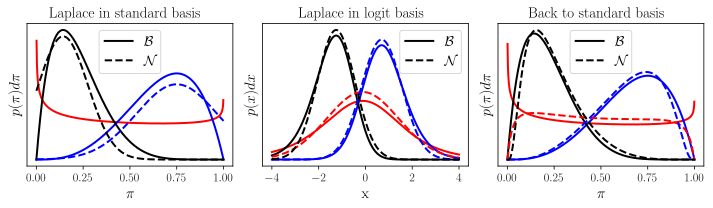

In [6]:
plot_beta_t_logit(params=[[0.8,0.9], [4,2,], [2, 7]], save=True, filename='beta_logit_bridge.pdf', show_back=True)

In [7]:
#Dirichlet Bridge for the BNN paper

"""values"""

def plot_beta_t_logit2(params, save=False, filename='beta_logit_bridge.pdf', show_back=True):

    a1, b1 = params[0] #5,1
    a2, b2 = params[1] #4,2
    a3, b3 = params[2] #8,3

    x = np.linspace(0,1, 1000 +1)
    x_t = np.linspace(-4,4, 1000 +1)

    mode1 = beta_mu(a1, b1)
    mode2 = beta_mu(a2, b2)
    mode3 = beta_mu(a3, b3)

    #plot1: normal base
    sigma1 = np.sqrt(beta_var(a1, b1))
    sigma2 = np.sqrt(beta_var(a2, b2))
    sigma3 = np.sqrt(beta_var(a3, b3))

    y1 = beta_pdf(x, a1, b1)
    y2 = beta_pdf(x, a2, b2)
    y3 = beta_pdf(x, a3, b3)

    LP_approx1 = norm.pdf(x, mode1, sigma1)
    LP_approx2 = norm.pdf(x, mode2, sigma2)
    LP_approx3 = norm.pdf(x, mode3, sigma3)

    #plot 2: transform to other base
    y1_t_logit = beta_t_logit_pdf(x_t, a1, b1)
    y2_t_logit = beta_t_logit_pdf(x_t, a2, b2)
    y3_t_logit = beta_t_logit_pdf(x_t, a3, b3)

    mode1_t_logit = beta_t_logit_mu(a1,b1)
    mode2_t_logit = beta_t_logit_mu(a2,b2)
    mode3_t_logit = beta_t_logit_mu(a3,b3)

    sigma1_t_logit = np.sqrt(beta_t_logit_var(a1, b1))
    sigma2_t_logit = np.sqrt(beta_t_logit_var(a2, b2))
    sigma3_t_logit = np.sqrt(beta_t_logit_var(a3, b3))


    LP_approx1_t_logit = norm.pdf(x_t, mode1_t_logit, sigma1_t_logit)
    LP_approx2_t_logit = norm.pdf(x_t, mode2_t_logit, sigma2_t_logit)
    LP_approx3_t_logit = norm.pdf(x_t, mode3_t_logit, sigma3_t_logit)

    #plot 3: transform back and reconstruct
    if show_back:
        y1_back = logit_normal_back(x, mode1_t_logit, sigma1_t_logit)
        y2_back = logit_normal_back(x, mode2_t_logit, sigma2_t_logit)
        y3_back = logit_normal_back(x, mode3_t_logit, sigma3_t_logit)

    """Plots"""
    
    legend_size=30
    xlabel_size=35
    ylabel_size=35
    title_size=32
    lw_size=3
    
    plt.rc('text', usetex=True)
    plt.rc('xtick', labelsize=25)
    plt.rc('ytick', labelsize=25)
    plt.rc('axes', labelsize=25)
    
    if show_back:
        fig, axs = plt.subplots(nrows=1, ncols=3, sharex=False, figsize=(12, 3))
    else:
        fig, axs = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(10, 3))
    
    #plot beta distribution and LPA in the standard basis
    axs[0].plot(x, y1, 'r-', lw=lw_size)
    axs[0].plot(x, y2, 'b-', lw=lw_size)
    axs[0].plot(x, y3, 'k-', lw=lw_size, label='$\mathcal{D}$')
    axs[0].plot(x, LP_approx1, 'r--', lw=lw_size)
    axs[0].plot(x, LP_approx2, 'b--', lw=lw_size)
    axs[0].plot(x, LP_approx3, 'k--', lw=lw_size, label='$\mathcal{N}$')
    axs[0].set_yticklabels([])
    axs[0].set_yticks([])
    axs[0].set_xlabel('$\pi$', fontsize=xlabel_size)
    axs[0].set_ylabel('$p(\pi)d\pi$', fontsize=ylabel_size)
    axs[0].set_title('Laplace in standard basis', fontsize=title_size)
    axs[0].legend(prop={'size': legend_size});

    #plot beta distribution in the transformed basis
    axs[1].plot(x_t, y1_t_logit, 'r-', lw=lw_size)
    axs[1].plot(x_t, y2_t_logit, 'b-', lw=lw_size)
    axs[1].plot(x_t, y3_t_logit, 'k-', lw=lw_size, label='$\mathcal{D}$')
    axs[1].plot(x_t, LP_approx1_t_logit, 'r--', lw=lw_size)
    axs[1].plot(x_t, LP_approx2_t_logit, 'b--', lw=lw_size)
    axs[1].plot(x_t, LP_approx3_t_logit, 'k--', lw=lw_size, label='$\mathcal{N}$')
    axs[1].set_xlabel('x', fontsize=xlabel_size)
    axs[1].set_ylabel('$p(x)dx$', fontsize=ylabel_size)
    axs[1].set_yticklabels([])
    axs[1].set_yticks([])
    axs[1].set_title('Laplace in logit basis', fontsize=title_size)
    axs[1].legend(prop={'size': legend_size});

    #plot backwards transformation of the LPA from the transformed to the standard basis
    if show_back:
        axs[2].plot(x, y1, 'r-', lw=lw_size)
        axs[2].plot(x, y2, 'b-', lw=lw_size)
        axs[2].plot(x, y3, 'k-', lw=lw_size, label='$\mathcal{D}$')
        axs[2].plot(x, y1_back, 'r--', lw=lw_size)
        axs[2].plot(x, y2_back, 'b--', lw=lw_size)
        axs[2].plot(x, y3_back, 'k--', lw=lw_size, label='$\mathcal{N}$')
        axs[2].set_yticklabels([])
        axs[2].set_yticks([])
        axs[2].set_xlabel('$\pi$', fontsize=xlabel_size)
        axs[2].set_ylabel('$p(\pi)d\pi$', fontsize=ylabel_size)
        axs[2].set_title('Transformation back to standard basis', fontsize=title_size)
        axs[2].legend(prop={'size': legend_size});

    plt.tight_layout()
    
    if save:

        plt.savefig(filename)

/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in sqrt
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in power
/home/marius/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:899: RuntimeWarning: invalid value encountered in greater_equal
  return (a <= x) & (x <= b)
/home/marius/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:899: RuntimeWarning: invalid value encountered in less_equal
  return (a <= x) & (x <= b)
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide

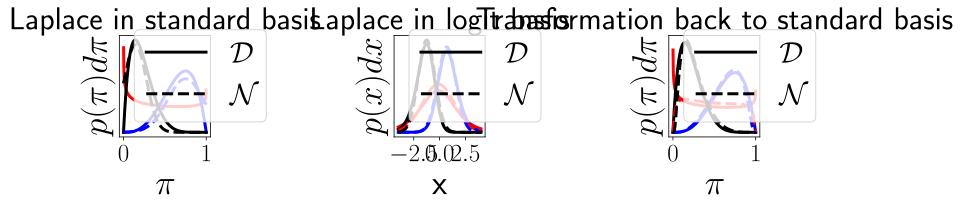

In [8]:
plot_beta_t_logit2(params=[[0.8,0.9], [4,2,], [2, 7]], save=True, filename='Dirichlet_LB_for_BNNs.pdf', show_back=True)

# Verify the Bridge

In [9]:
def alpha_beta_from_normal(mu, sigma):
    a = (np.exp(mu) + 1)/sigma**2
    b = (np.exp(-mu) + 1)/sigma**2

    return(a, b)

test_a1, test_b1 = 3,4
test_m1, test_s1 = beta_t_logit_mu(test_a1, test_b1), np.sqrt(beta_t_logit_var(test_a1, test_b1))
test_a2, test_b2 = alpha_beta_from_normal(test_m1, test_s1)

print(test_a2, test_b2)

rand_a1, rand_b1 = np.random.random(), np.random.random()
rand_m1, rand_s1 = beta_t_logit_mu(rand_a1, rand_b1), np.sqrt(beta_t_logit_var(rand_a1, rand_b1))
rand_a2, rand_b2 = alpha_beta_from_normal(rand_m1, rand_s1)

assert(np.allclose(rand_a1, rand_a2))
assert(np.allclose(rand_b1, rand_b2))

3.0 3.999999999999999


# Statistical distance measures

In [10]:
from torch_two_sample import MMDStatistic
from scipy.stats import norm, beta
import torch

## MMD from 100 combinations of parameters

In [11]:
def MMD_combinations(params, plot=False, n_samples=1000, verbose=True):
    
    As = params[0]
    Bs = params[1]
    
    MMD_sum = 0
    MMD_t_logit_sum = 0 

    for a in As:
        for b in Bs:
            
            if verbose:
                print("a: ", a, "b: ", b)
                
            if a < 1 or b < 1:
                print("a < 1 or b < 1: not legitimate in standard base")
                
            #if a+b == 2:
            #    break
            
            #get samples from all dists
            #standard
            B_samples = beta.rvs(a, b, size=n_samples)
            if a >= 1:                
                mode1 = beta_mu(a, b)
                sigma1 = np.sqrt(beta_var(a, b))
                N_samples = norm.rvs(mode1, sigma1, size=n_samples)
            
            #logit
            mode1_logit = beta_t_logit_mu(a, b)
            sigma1_logit = np.sqrt(beta_t_logit_var(a, b))
            B_samples_logit = logit_transform(B_samples)
            N_samples_logit = norm.rvs(mode1_logit, sigma1_logit, size=n_samples)
            
            
            #calculate MMD for all bases
            MMD = MMDStatistic(n_samples, n_samples)
            
            #standard
            B_samples_ = torch.Tensor(B_samples.reshape((n_samples, -1)))
            if a >= 1:
                N_samples_ = torch.Tensor(N_samples.reshape((n_samples, -1)))
                MMD_ = MMD(B_samples_, N_samples_,  alphas=[0.5], ret_matrix=False)
                MMD_ = torch.max(torch.zeros(1), MMD_)
            else:
                MMD_ = torch.Tensor([np.nan])
                
            #logit
            B_samples_logit_ = torch.Tensor(B_samples_logit.reshape((n_samples, -1)))
            N_samples_logit_ = torch.Tensor(N_samples_logit.reshape((n_samples, -1)))
            MMD_logit_= MMD(B_samples_logit_, N_samples_logit_,  alphas=[0.5], ret_matrix=False)
            MMD_logit_= torch.max(torch.zeros(1), MMD_logit_)
            

            if plot:
                n_bins = int(np.sqrt(n_samples))
                fig, axs = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(23, 6))
                axs[0].hist(B_samples, bins = n_bins, alpha=0.5, label='$\mathcal{B}$')
                axs[0].hist(N_samples, bins = n_bins, alpha=0.5, label='$\mathcal{N}$')
                axs[0].set_title('standard basis')
                axs[0].legend()
                
                axs[1].hist(B_samples_logit, bins = n_bins, alpha=0.5, label='$\mathcal{B}$')
                axs[1].hist(N_samples_logit, bins = n_bins, alpha=0.5, label='$\mathcal{N}$')
                axs[1].set_title('logit basis')
                axs[1].legend()
                
                plt.show()
                
            if verbose: 
                print("standard: ", MMD_.item(), "logit: ", MMD_logit_.item())

            #add them to their respective sums
            MMD_sum += MMD_
            MMD_t_logit_sum += MMD_logit_
            
    return(MMD_sum.item(), MMD_t_logit_sum.item())

In [12]:
MMD_combinations(params=[np.arange(1.1, 5.1, 0.5), np.arange(1.1, 5.1, 0.5)], plot=False, verbose=True, n_samples=2000)

a:  1.1 b:  1.1
standard:  0.154685378074646 logit:  0.005679875612258911
a:  1.1 b:  1.6
standard:  0.06082123517990112 logit:  0.0034028291702270508
a:  1.1 b:  2.1
standard:  0.05424058437347412 logit:  0.005822926759719849
a:  1.1 b:  2.6
standard:  0.044775426387786865 logit:  0.009535074234008789
a:  1.1 b:  3.1
standard:  0.041344404220581055 logit:  0.0041465163230896
a:  1.1 b:  3.6
standard:  0.03441178798675537 logit:  0.013113260269165039
a:  1.1 b:  4.1
standard:  0.029863595962524414 logit:  0.010704219341278076
a:  1.1 b:  4.6
standard:  0.026418209075927734 logit:  0.013564646244049072
a:  1.6 b:  1.1
standard:  0.04772073030471802 logit:  0.004562646150588989
a:  1.6 b:  1.6
standard:  0.008996427059173584 logit:  0.004292726516723633
a:  1.6 b:  2.1
standard:  0.007505297660827637 logit:  0.0011506080627441406
a:  1.6 b:  2.6
standard:  0.009897410869598389 logit:  0.0037825703620910645
a:  1.6 b:  3.1
standard:  0.01347041130065918 logit:  0.004537642002105713
a:  1.

(0.9425132870674133, 0.21515318751335144)

In [13]:
results_MMD = np.array([0.9365966320037842, 0.2407502830028534])
results_MMD_normed = results_MMD/results_MMD[0]
print(results_MMD_normed)

[1.         0.25704799]


# KL-divergence from samples

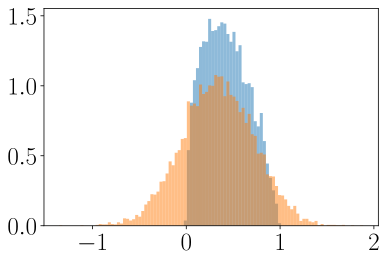

In [14]:
from scipy.stats import beta, norm

a_test = 1.5
b_test = 2
beta_test = beta.rvs(a_test, b_test, size=10000)

mu_test = beta_mu(a_test, b_test)
sigma_test = np.sqrt(beta_var(a_test, b_test))

norm_test = norm.rvs(mu_test, sigma_test, size=10000)

q_min = norm_test.min()
q_max = norm_test.max()

plt.hist(beta_test, density=True, bins=100, alpha=0.5, range=[q_min, q_max])
plt.hist(norm_test, density=True, bins=100, alpha=0.5, range=[q_min, q_max])
plt.show();

In [15]:
# compute KL div

p_hist, _ = np.histogram(beta_test, density=True, bins=100, range=[q_min, q_max])
q_hist, _ = np.histogram(norm_test, density=True, bins=100, range=[q_min, q_max])

KL_div = np.sum(p_hist * np.log(p_hist/(q_hist + 1e-8) + 1e-8))
print(KL_div)

8.452658108280723


In [16]:
def KL_div_samples_beta(a, b, num_samples, logit=False, plot=False):
    
    beta_samples = beta.rvs(a, b, size=num_samples)
    num_bins = int(np.sqrt(num_samples))
    
    if logit:
    
        beta_samples_logit = logit_transform(beta_samples)
        mu_beta_logit = beta_t_logit_mu(a, b)
        sigma_beta_logit = np.sqrt(beta_t_logit_var(a, b))
        norm_samples = norm.rvs(mu_beta_logit, sigma_beta_logit, size=num_samples)

        q_min = norm_samples.min()
        q_max = norm_samples.max()

        p_hist, _ = np.histogram(beta_samples_logit, density=True, bins=num_bins, range=[q_min, q_max])
        q_hist, _ = np.histogram(norm_samples, density=True, bins=num_bins, range=[q_min, q_max])

        KL_div = np.sum(p_hist * np.log(p_hist/(q_hist + 1e-8) + 1e-8))
        
        if plot:
            plt.hist(beta_samples_logit, density=True, bins=num_bins, range=[q_min, q_max], alpha=0.5)
            plt.hist(norm_samples, density=True, bins=num_bins, range=[q_min, q_max], alpha=0.5)
            plt.show();

        return(KL_div)
    
    else:
    
        mu_beta = beta_mu(a, b)
        sigma_beta = np.sqrt(beta_var(a, b))
        norm_samples = norm.rvs(mu_beta, sigma_beta, size=num_samples)

        q_min = norm_samples.min()
        q_max = norm_samples.max()

        p_hist, _ = np.histogram(beta_samples, density=True, bins=num_bins, range=[q_min, q_max])
        q_hist, _ = np.histogram(norm_samples, density=True, bins=num_bins, range=[q_min, q_max])

        KL_div = np.sum(p_hist * np.log(p_hist/(q_hist + 1e-8) + 1e-8))
        
        if plot:
            plt.hist(beta_samples, density=True, bins=num_bins, range=[q_min, q_max], alpha=0.5)
            plt.hist(norm_samples, density=True, bins=num_bins, range=[q_min, q_max], alpha=0.5)
            plt.show();

        return(KL_div)



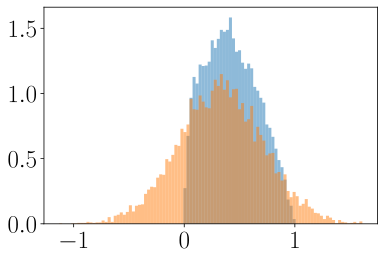

10.273951663058167


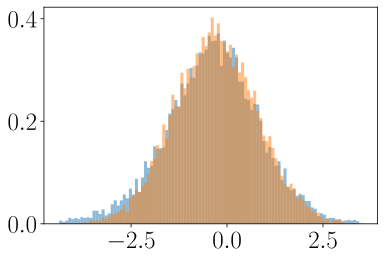

0.9219043977672798


In [17]:
print(KL_div_samples_beta(a_test, b_test, 10000, plot=True))
print(KL_div_samples_beta(a_test, b_test, 10000, logit=True, plot=True))

In [18]:
def KL_div_samples_combinations(params, num_samples, plot=False, verbose=True):
    
    As = params[0]
    Bs = params[1]
    
    KL_div_sum = 0
    KL_div_logit_sum = 0 

    for a in As:
        for b in Bs:
            
            if verbose:
                print("a: ", a, "b: ", b)
                
            if a < 1 or b < 1:
                print("a < 1 or b < 1: not legitimate in standard base")
                
            if a+b == 2:
                print("a+b == 2")
                break
                
            #compute KL-div for logit base
            KL_div_logit_ = KL_div_samples_beta(a, b, num_samples=num_samples, logit=True, plot=False)
            KL_div_logit_sum += KL_div_logit_
            
            #get the ranges and pdfs
            if a >= 1 and b >= 1:
                KL_div_ = KL_div_samples_beta(a, b, num_samples=num_samples, plot=False)
            else:
                KL_div_ = np.nan
            KL_div_sum += KL_div_
            
            if verbose:
                print("standard: ", KL_div_, "logit: ", KL_div_logit_)
            
            
    return(KL_div_sum, KL_div_logit_sum)

In [19]:
print(KL_div_samples_combinations(params=[np.arange(1.1, 5.1, 0.5), np.arange(1.1, 5.1, 0.5)], verbose=True, num_samples=10000))

a:  1.1 b:  1.1
standard:  10.665053067053783 logit:  1.0400105047314832
a:  1.1 b:  1.6
standard:  14.180471741715852 logit:  1.3007535970275819
a:  1.1 b:  2.1
standard:  35.16947804199671 logit:  1.0922725195652019
a:  1.1 b:  2.6
standard:  63.45850069459251 logit:  1.454713893386291
a:  1.1 b:  3.1
standard:  96.51398342885997 logit:  1.7940809883462252
a:  1.1 b:  3.6
standard:  120.32311204619272 logit:  2.0173428705449883
a:  1.1 b:  4.1
standard:  285.57006432316 logit:  1.7421241959653182
a:  1.1 b:  4.6
standard:  231.95565593391154 logit:  2.3440245694195943
a:  1.6 b:  1.1
standard:  15.801723165429873 logit:  1.1844762463401481
a:  1.6 b:  1.6
standard:  8.956253216228255 logit:  1.030600452332444
a:  1.6 b:  2.1
standard:  10.270882303545097 logit:  1.1126076231692048
a:  1.6 b:  2.6
standard:  9.912561424857508 logit:  0.9258217590549801
a:  1.6 b:  3.1
standard:  12.165874762247434 logit:  0.6132051458152731
a:  1.6 b:  3.6
standard:  16.698730415894474 logit:  1.23551

# KL-divergence from samples attempt 2

In [20]:
def KL_div_samples_beta2(a, b, num_samples, logit=False, plot=False):
    
    beta_samples = beta.rvs(a, b, size=num_samples)
    num_bins = int(np.sqrt(num_samples))
    
    if logit:
    
        beta_samples_logit = logit_transform(beta_samples)
        mu_beta_logit = beta_t_logit_mu(a, b)
        sigma_beta_logit = np.sqrt(beta_t_logit_var(a, b))
        
        s = np.array(beta_samples_logit)
        p_ = beta_t_logit_pdf(s, a, b)
        q_ = norm.pdf(s, mu_beta_logit, sigma_beta_logit)
        KL_div_logit_ = np.mean(np.log(p_/q_))
            
        if plot:
            x_ = np.linspace(s.min(), s.max(), 1000+1)
            plt.hist(s, density=True, bins=num_bins)
            plt.plot(x_, beta_t_logit_pdf(x_, a, b))
            plt.plot(x_, norm.pdf(x_, mu_beta_logit, sigma_beta_logit))
            plt.title('logit-base')
            plt.show();
            
            
        return(KL_div_logit_)
        
    else:
        
        mu_beta = beta_mu(a, b)
        sigma_beta = np.sqrt(beta_var(a, b))
        
        s = np.array(beta_samples)
        p_ = beta.pdf(s, a, b)
        q_ = norm.pdf(s, mu_beta, sigma_beta)
        KL_div_ = np.mean(np.log(p_/q_))
            
        if plot:
            x_ = np.linspace(s.min(), s.max(), 1000+1)
            plt.hist(s, density=True, bins=num_bins)
            plt.plot(x_, beta.pdf(x_, a, b))
            plt.plot(x_, norm.pdf(x_, mu_beta, sigma_beta))
            plt.title('standard-base')
            plt.show();
            
        return(KL_div_)

In [21]:
def KL_div_samples_combinations2(params, num_samples, plot=False, verbose=True):
    
    As = params[0]
    Bs = params[1]
    
    KL_div_sum = 0
    KL_div_logit_sum = 0 

    for a in As:
        for b in Bs:
            
            if verbose:
                print("a: ", a, "b: ", b)
                
            if a < 1 or b < 1:
                print("a < 1 or b < 1: not legitimate in standard base")
                
            if a+b == 2:
                print("a+b == 2")
                break
                
            #compute KL-div for logit base
            KL_div_logit_ = KL_div_samples_beta2(a, b, num_samples=num_samples, logit=True, plot=plot)
            KL_div_logit_sum += KL_div_logit_
            
            #get the ranges and pdfs
            if a >= 1 and b >= 1:
                KL_div_ = KL_div_samples_beta2(a, b, num_samples=num_samples, plot=plot)
            else:
                KL_div_ = np.nan
            KL_div_sum += KL_div_
            
            if verbose:
                print("standard: ", KL_div_, "logit: ", KL_div_logit_)
            
            
    return(KL_div_sum, KL_div_logit_sum)

In [22]:
print(KL_div_samples_combinations2(params=[np.arange(1.1, 5.1, 0.5), np.arange(1.1, 5.1, 0.5)], plot=False, verbose=True, num_samples=10000))

a:  1.1 b:  1.1
standard:  1.0639760765232391 logit:  0.06913161484848097
a:  1.1 b:  1.6
standard:  0.5083908248536937 logit:  0.07359309607378671
a:  1.1 b:  2.1
standard:  0.682171809127128 logit:  0.08594249760282059
a:  1.1 b:  2.6
standard:  1.0457264195156932 logit:  0.11166203072071285
a:  1.1 b:  3.1
standard:  1.4746164532819304 logit:  0.13896738946902262
a:  1.1 b:  3.6
standard:  1.906566106134405 logit:  0.13590360996153894
a:  1.1 b:  4.1
standard:  2.329426984082088 logit:  0.14542316222774967
a:  1.1 b:  4.6
standard:  2.719483095299797 logit:  0.16802029841645486
a:  1.6 b:  1.1
standard:  0.5096024085870505 logit:  0.05996727290823677
a:  1.6 b:  1.6
standard:  0.3419290413675533 logit:  0.029006111760768498
a:  1.6 b:  2.1
standard:  0.25492846781652906 logit:  0.02816301702976517
a:  1.6 b:  2.6
standard:  0.22834102411949325 logit:  0.047995361330696346
a:  1.6 b:  3.1
standard:  0.24013523314203586 logit:  0.050396618401839226
a:  1.6 b:  3.6
standard:  0.2678256

# KL-divergence from samples attempt 2 but transformed back

In [23]:
def KL_div_samples_beta2_back(a, b, num_samples, logit=False, plot=False):
    
    beta_samples = beta.rvs(a, b, size=num_samples)
    num_bins = int(np.sqrt(num_samples))
    
    if logit:
    
        #beta_samples_logit = logit_transform(beta_samples)
        mu_beta_logit = beta_t_logit_mu(a, b)
        sigma_beta_logit = np.sqrt(beta_t_logit_var(a, b))
        
        s = np.array(beta_samples)
        #p_ = beta_t_logit_pdf(s, a, b)
        #q_ = norm.pdf(s, mu_beta_logit, sigma_beta_logit)
        p_ = beta.pdf(s, a, b)
        q_ = logit_normal_back(s, mu_beta_logit, sigma_beta_logit)
        KL_div_logit_ = np.mean(np.log(p_/q_))
            
        if plot:
            x_ = np.linspace(s.min(), s.max(), 1000+1)
            plt.hist(s, density=True, bins=num_bins)
            plt.plot(x_, beta.pdf(x_, a, b))
            plt.plot(x_, logit_normal_back(x_, mu_beta_logit, sigma_beta_logit))
            plt.title('back to standard-base')
            plt.show();
            
            
        return(KL_div_logit_)
        
    else:
        
        mu_beta = beta_mu(a, b)
        sigma_beta = np.sqrt(beta_var(a, b))
        
        s = np.array(beta_samples)
        p_ = beta.pdf(s, a, b)
        q_ = norm.pdf(s, mu_beta, sigma_beta)
        KL_div_ = np.mean(np.log(p_/q_))
            
        if plot:
            x_ = np.linspace(s.min(), s.max(), 1000+1)
            plt.hist(s, density=True, bins=num_bins)
            plt.plot(x_, beta.pdf(x_, a, b))
            plt.plot(x_, norm.pdf(x_, mu_beta, sigma_beta))
            plt.title('standard-base')
            plt.show();
            
        return(KL_div_)

In [24]:
def KL_div_samples_combinations2_back(params, num_samples, plot=False, verbose=True):
    
    As = params[0]
    Bs = params[1]
    
    KL_div_sum = 0
    KL_div_logit_sum = 0 

    for a in As:
        for b in Bs:
            
            if verbose:
                print("a: ", a, "b: ", b)
                
            if a < 1 or b < 1:
                print("a < 1 or b < 1: not legitimate in standard base")
                
            if a+b == 2:
                print("a+b == 2")
                break
                
            #compute KL-div for logit base
            KL_div_logit_ = KL_div_samples_beta2_back(a, b, num_samples=num_samples, logit=True, plot=plot)
            KL_div_logit_sum += KL_div_logit_
            
            #get the ranges and pdfs
            if a >= 1 and b >= 1:
                KL_div_ = KL_div_samples_beta2_back(a, b, num_samples=num_samples, plot=plot)
            else:
                KL_div_ = np.nan
            KL_div_sum += KL_div_
            
            if verbose:
                print("standard: ", KL_div_, "logit: ", KL_div_logit_)
            
            
    return(KL_div_sum, KL_div_logit_sum)

In [25]:
print(KL_div_samples_combinations2_back(params=[np.arange(1.1, 5.1, 0.5), np.arange(1.1, 5.1, 0.5)], plot=False, verbose=True, num_samples=10000))

a:  1.1 b:  1.1
standard:  1.0645610639920184 logit:  0.07423385751180195
a:  1.1 b:  1.6
standard:  0.506974746149923 logit:  0.07208283261422266
a:  1.1 b:  2.1
standard:  0.6654969524192302 logit:  0.09198939913438607
a:  1.1 b:  2.6
standard:  1.0664834553551443 logit:  0.10984083572858094
a:  1.1 b:  3.1
standard:  1.4634618488568072 logit:  0.13374041611006945
a:  1.1 b:  3.6
standard:  1.8527896861787503 logit:  0.14633309668973143
a:  1.1 b:  4.1
standard:  2.245195431559922 logit:  0.15720609619631729
a:  1.1 b:  4.6
standard:  2.7496060382180225 logit:  0.17031151555744406
a:  1.6 b:  1.1
standard:  0.5052069803414942 logit:  0.06780528855729123
a:  1.6 b:  1.6
standard:  0.3412001798131523 logit:  0.03373853247851162
a:  1.6 b:  2.1
standard:  0.25347019682790894 logit:  0.03532263367326131
a:  1.6 b:  2.6
standard:  0.22737497159969772 logit:  0.03906606545681329
a:  1.6 b:  3.1
standard:  0.23562154309486633 logit:  0.053149925511451646
a:  1.6 b:  3.6
standard:  0.2606355

# KL div from integration

In [26]:
from scipy.integrate import quad

def KL_div_quad_beta3(a, b, logit=False, plot=False):
    
    
    if logit:
    
        mu_beta_logit = beta_t_logit_mu(a, b)
        sigma_beta_logit = np.sqrt(beta_t_logit_var(a, b))
        
        def KL_div_logit(x):
            p_ = beta_t_logit_pdf(x, a, b)
            q_ = norm.pdf(x, mu_beta_logit, sigma_beta_logit)
            KL_div_logit_ = p_ * np.log(p_/q_)
            return(KL_div_logit_)
        
        KL_div_logit_result, _ = quad(KL_div_logit, -10, 10)
        print(KL_div_logit_result)
            
        if plot:
            x_ = np.linspace(-10, 10, 1000+1)
            plt.plot(x_, beta_t_logit_pdf(x_, a, b))
            plt.plot(x_, norm.pdf(x_, mu_beta_logit, sigma_beta_logit))
            plt.title('logit-base')
            plt.show();
            
            
        return(KL_div_logit_result)
        
    else:
        
        mu_beta = beta_mu(a, b)
        sigma_beta = np.sqrt(beta_var(a, b))
        
        def KL_div(x):
            p_ = beta_pdf(x, a, b)
            q_ = norm.pdf(x, mu_beta, sigma_beta)
            KL_div_ = p_ * np.log(p_/q_)
            return(KL_div_)
            
        KL_div_result,_ = quad(KL_div, 0, 1)
            
        if plot:
            x_ = np.linspace(0, 1, 1000+1)
            plt.plot(x_, beta_pdf(x_, a, b))
            plt.plot(x_, norm.pdf(x_, mu_beta, sigma_beta))
            plt.title('standard-base')
            plt.show();
            
            
        return(KL_div_result)

In [27]:
def KL_div_quad_combinations3(params, plot=False, verbose=True):
    
    As = params[0]
    Bs = params[1]
    
    KL_div_sum = 0
    KL_div_logit_sum = 0 

    for a in As:
        for b in Bs:
            
            if verbose:
                print("a: ", a, "b: ", b)
                
            if a < 1 or b < 1:
                print("a < 1 or b < 1: not legitimate in standard base")
                
            if a+b == 2:
                print("a+b == 2")
                break
                
            #compute KL-div for logit base
            KL_div_logit_ = KL_div_quad_beta3(a, b, logit=True, plot=plot)
            KL_div_logit_sum += KL_div_logit_
            
            #get the ranges and pdfs
            if a >= 1 and b >= 1:
                KL_div_ = KL_div_quad_beta3(a, b, plot=plot)
            else:
                KL_div_ = np.nan
            KL_div_sum += KL_div_
            
            if verbose:
                print("standard: ", KL_div_, "logit: ", KL_div_logit_)
            
            
    return(KL_div_sum, KL_div_logit_sum)

In [28]:
print(KL_div_quad_combinations3(params=[np.arange(1.1, 5.1, 0.5), np.arange(1.1, 5.1, 0.5)], plot=False, verbose=True))

a:  1.1 b:  1.1
0.07233059682581044
standard:  1.0648429827416603 logit:  0.07233059682581044
a:  1.1 b:  1.6
0.07062660642084066
standard:  0.5065883305652116 logit:  0.07062660642084066
a:  1.1 b:  2.1
0.08870619208262676
standard:  0.6790911277991601 logit:  0.08870619208262676
a:  1.1 b:  2.6
0.1079816410295078
standard:  1.0579412849808967 logit:  0.1079816410295078
a:  1.1 b:  3.1
0.12510350112740234
standard:  1.4891207587998798 logit:  0.12510350112740234
a:  1.1 b:  3.6
0.13971901747596488
standard:  1.9177133239132103 logit:  0.13971901747596488
a:  1.1 b:  4.1
0.1521100783297342
standard:  2.323201727335983 logit:  0.1521100783297342
a:  1.1 b:  4.6
0.1626503713134167
standard:  2.6987718654342547 logit:  0.1626503713134167
a:  1.6 b:  1.1
0.07062660642084172
standard:  0.5065883305652099 logit:  0.07062660642084172
a:  1.6 b:  1.6
0.03489857333637915
standard:  0.34072634943755675 logit:  0.03489857333637915
a:  1.6 b:  2.1
0.03354666823283559
standard:  0.2536821649238972 

# Statistical distance measures for small, medium and large $\theta$

/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in sqrt
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in power
/home/marius/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:899: RuntimeWarning: invalid value encountered in greater_equal
  return (a <= x) & (x <= b)
/home/marius/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:899: RuntimeWarning: invalid value encountered in less_equal
  return (a <= x) & (x <= b)
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide

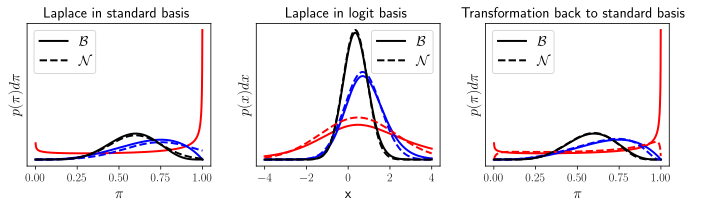

In [29]:
a_s, b_s = 0.8, 0.5
a_m, b_m = 4,2
a_l, b_l = 7,5
plot_beta_t_logit(params=[[a_s, b_s], [a_m, b_m], [a_l, b_l]])

## calculate MMD for the three pairs of parameters

In [30]:
# use 10 seeds
MMD_results_s = []
MMD_results_m = []
MMD_results_l = []

for s in range(10):
    print("seed: ", s)
    np.random.seed(s)
    torch.manual_seed(s)
    MMD_s = MMD_combinations(params = [[a_s], [b_s]], n_samples=2000)
    MMD_m = MMD_combinations(params = [[a_m], [b_m]], n_samples=2000)
    MMD_l = MMD_combinations(params = [[a_l], [b_l]], n_samples=2000, plot=False)
    MMD_results_s += [MMD_s]
    MMD_results_m += [MMD_m]
    MMD_results_l += [MMD_l]
    
MMD_results_mean_s = np.array(MMD_results_s).mean(0)
MMD_results_mean_m = np.array(MMD_results_m).mean(0)
MMD_results_mean_l = np.array(MMD_results_l).mean(0)
print(MMD_results_mean_s)
print(MMD_results_mean_m)
print(MMD_results_mean_l)

seed:  0
a:  0.8 b:  0.5
a < 1 or b < 1: not legitimate in standard base
standard:  nan logit:  0.012013792991638184
a:  4 b:  2
standard:  0.006937801837921143 logit:  0.001651763916015625
a:  7 b:  5
standard:  7.164478302001953e-05 logit:  0.0010169148445129395
seed:  1
a:  0.8 b:  0.5
a < 1 or b < 1: not legitimate in standard base
standard:  nan logit:  0.011223763227462769
a:  4 b:  2
standard:  0.006607413291931152 logit:  0.0031437277793884277
a:  7 b:  5
standard:  0.00010716915130615234 logit:  0.0008414387702941895
seed:  2
a:  0.8 b:  0.5
a < 1 or b < 1: not legitimate in standard base
standard:  nan logit:  0.01221776008605957
a:  4 b:  2
standard:  0.007102847099304199 logit:  0.001752018928527832
a:  7 b:  5
standard:  0.00022721290588378906 logit:  0.0003739595413208008
seed:  3
a:  0.8 b:  0.5
a < 1 or b < 1: not legitimate in standard base
standard:  nan logit:  0.014718681573867798
a:  4 b:  2
standard:  0.006534993648529053 logit:  0.002568840980529785
a:  7 b:  5
s

In [31]:
# normalize to 1 for comparison
MMD_results_mean_s[0] = MMD_results_mean_s[1:].max()
MMD_results_mean_s_normalized = MMD_results_mean_s/MMD_results_mean_s.max()
MMD_results_mean_s_normalized[0] = np.nan
print(MMD_results_mean_s_normalized)
print(MMD_results_mean_m/MMD_results_mean_m.max())
print(MMD_results_mean_l/MMD_results_mean_l.max())

[nan  1.]
[1.         0.37400502]
[0.23713512 1.        ]


## calculate KL div for the three lambdas

In [32]:
KL_results_s = []
KL_results_m = []
KL_results_l = []

for s in range(10):
    print("seed: ", s)
    np.random.seed(s)
    KL_s = KL_div_samples_combinations(params = [[a_s], [b_s]], num_samples=10000)
    KL_m = KL_div_samples_combinations(params = [[a_m], [b_m]], num_samples=10000)
    KL_l = KL_div_samples_combinations(params = [[a_l], [b_l]], num_samples=10000)
    KL_results_s += [KL_s]
    KL_results_m += [KL_m]
    KL_results_l += [KL_l]
    
KL_results_mean_s = np.array(KL_results_s).mean(0)
KL_results_mean_m = np.array(KL_results_m).mean(0)
KL_results_mean_l = np.array(KL_results_l).mean(0)
print(KL_results_mean_s)
print(KL_results_mean_m)
print(KL_results_mean_l)

seed:  0
a:  0.8 b:  0.5
a < 1 or b < 1: not legitimate in standard base
standard:  nan logit:  1.4729749862433978
a:  4 b:  2
standard:  10.59257538341752 logit:  0.40597843987497106
a:  7 b:  5
standard:  3.4698236685062325 logit:  0.5890701794934912
seed:  1
a:  0.8 b:  0.5
a < 1 or b < 1: not legitimate in standard base
standard:  nan logit:  1.3821850566986429
a:  4 b:  2
standard:  10.644586332546542 logit:  1.3032463407492914
a:  7 b:  5
standard:  3.4272027735941624 logit:  0.48262203325625136
seed:  2
a:  0.8 b:  0.5
a < 1 or b < 1: not legitimate in standard base
standard:  nan logit:  1.7683538308648095
a:  4 b:  2
standard:  9.232670044402948 logit:  1.0455580081344786
a:  7 b:  5
standard:  2.8359743287166466 logit:  0.4212283454528968
seed:  3
a:  0.8 b:  0.5
a < 1 or b < 1: not legitimate in standard base
standard:  nan logit:  2.5314642136258176
a:  4 b:  2
standard:  11.22613640972159 logit:  0.9243694413561733
a:  7 b:  5
standard:  2.5863954213169396 logit:  0.592075

In [33]:
# normalize to 1 for comparison
KL_results_mean_s[0] = KL_results_mean_s[1:].max()
KL_results_mean_s_normalized = KL_results_mean_s/KL_results_mean_s.max()
KL_results_mean_s_normalized[0] = np.nan
print(KL_results_mean_s_normalized)
print(KL_results_mean_m/KL_results_mean_m.max())
print(KL_results_mean_l/KL_results_mean_l.max())

[nan  1.]
[1.         0.10336585]
[1.         0.21760523]


# Calculate KL-divergence for growing a, b and plot it

In [34]:
As = np.arange(0.7, 5.7, 0.5)
Bs = np.arange(0.8, 3.3, 0.25)
print(len(As), len(Bs))
ABs = np.array(list(zip(As, Bs)))
print(ABs)

10 10
[[0.7  0.8 ]
 [1.2  1.05]
 [1.7  1.3 ]
 [2.2  1.55]
 [2.7  1.8 ]
 [3.2  2.05]
 [3.7  2.3 ]
 [4.2  2.55]
 [4.7  2.8 ]
 [5.2  3.05]]


In [35]:
KL_results_linear = []

for s in range(10):
    print("seed: ", s)
    np.random.seed(s)
    
    results_seed = []
    for t in ABs:
        a_, b_ = t
        KL_ = KL_div_samples_combinations2_back([[a_], [b_]], verbose=True, num_samples=10000)
        #KL_ = KL_div_quad_combinations3([[a_], [b_]], verbose=True)
        print(KL_)
        results_seed.append(KL_)
    
    KL_results_linear.append(results_seed)

seed:  0
a:  0.7 b:  0.8
a < 1 or b < 1: not legitimate in standard base
standard:  nan logit:  0.17783690092516122
(nan, 0.17783690092516122)
a:  1.2 b:  1.05
standard:  0.8230672166126737 logit:  0.07527362882113219
(0.8230672166126737, 0.07527362882113219)
a:  1.7 b:  1.3
standard:  0.399551096414083 logit:  0.04787434159170601
(0.399551096414083, 0.04787434159170601)
a:  2.2 b:  1.55
standard:  0.25482772220423483 logit:  0.04092514909764256
(0.25482772220423483, 0.04092514909764256)
a:  2.7 b:  1.8
standard:  0.18536416320998222 logit:  0.03408006861590967
(0.18536416320998222, 0.03408006861590967)
a:  3.2 b:  2.05
standard:  0.1466903790980938 logit:  0.025001186734364717
(0.1466903790980938, 0.025001186734364717)
a:  3.7 b:  2.3
standard:  0.11434919182584866 logit:  0.02568861327739363
(0.11434919182584866, 0.02568861327739363)
a:  4.2 b:  2.55
standard:  0.10193692047684233 logit:  0.025134063150112677
(0.10193692047684233, 0.025134063150112677)
a:  4.7 b:  2.8
standard:  0.08

standard:  0.0880225088492498 logit:  0.013878008509915257
(0.0880225088492498, 0.013878008509915257)
a:  5.2 b:  3.05
standard:  0.07702102679941839 logit:  0.0160693782284846
(0.07702102679941839, 0.0160693782284846)
seed:  7
a:  0.7 b:  0.8
a < 1 or b < 1: not legitimate in standard base
standard:  nan logit:  0.16342154346496618
(nan, 0.16342154346496618)
a:  1.2 b:  1.05
standard:  0.8224685929425337 logit:  0.06809151368542679
(0.8224685929425337, 0.06809151368542679)
a:  1.7 b:  1.3
standard:  0.3957760596090764 logit:  0.04971934492620767
(0.3957760596090764, 0.04971934492620767)
a:  2.2 b:  1.55
standard:  0.2560288337672034 logit:  0.04267429605921457
(0.2560288337672034, 0.04267429605921457)
a:  2.7 b:  1.8
standard:  0.18649630292509636 logit:  0.0330481594449492
(0.18649630292509636, 0.0330481594449492)
a:  3.2 b:  2.05
standard:  0.1428616981216304 logit:  0.026118123374322094
(0.1428616981216304, 0.026118123374322094)
a:  3.7 b:  2.3
standard:  0.12047199265743125 logit:

In [36]:
# handle the data
KL_results_linear = np.array(KL_results_linear)

# take the mean over the 10 seeds
KL_results_linear_mean = KL_results_linear.mean(0)
print(np.shape(KL_results_linear_mean))

(10, 2)


In [37]:
KL_results_linear_mean

array([[       nan, 0.15714474],
       [0.82231643, 0.07242149],
       [0.39729308, 0.04906668],
       [0.25605381, 0.03818905],
       [0.18683382, 0.03053238],
       [0.14489305, 0.02559184],
       [0.11919432, 0.02186451],
       [0.10061465, 0.01873279],
       [0.08674879, 0.01575502],
       [0.07473803, 0.01598368]])

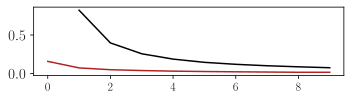

In [40]:
# make plots

fig = plt.figure(figsize=(5, 1.5))
plt.plot(KL_results_linear_mean[:,0], label='standard base', color='black')
plt.plot(KL_results_linear_mean[:,1], label='logit base', color='firebrick')
#plt.legend()
plt.tight_layout()

#"""
tpl.save(
    "KL_Beta.tex",
    figure = fig,
    axis_width = "\\figwidth",
    axis_height= "\\figheight",
    tex_relative_path_to_data=".",
    override_externals=True,
    float_format=".3g"
)
#"""

#plt.savefig('KL_Beta.pdf')

plt.show();

In [ ]:
# make plots

plt.figure(figsize=(5, 1.5))
plt.plot(KL_results_linear_mean[3:,0], label='standard base')
plt.plot(KL_results_linear_mean[3:,1], label='logit base')
plt.legend()
plt.tight_layout()

plt.show();

# calculate MMD for the growing a, b and plot it

In [41]:
MMD_results_linear = []

for s in range(10):
    print("seed: ", s)
    np.random.seed(s)
    
    results_seed = []
    for t in ABs:
        a_, b_ = t
        MMD_ = MMD_combinations(params = [[a_], [b_]], n_samples=2000)
        results_seed.append(MMD_)
    
    MMD_results_linear.append(results_seed)

seed:  0
a:  0.7 b:  0.8
a < 1 or b < 1: not legitimate in standard base
standard:  nan logit:  0.008635669946670532
a:  1.2 b:  1.05
standard:  0.09821581840515137 logit:  0.004221677780151367
a:  1.7 b:  1.3
standard:  0.022348344326019287 logit:  0.004112660884857178
a:  2.2 b:  1.55
standard:  0.010022103786468506 logit:  0.002478957176208496
a:  2.7 b:  1.8
standard:  0.005078554153442383 logit:  0.0017266273498535156
a:  3.2 b:  2.05
standard:  0.004196345806121826 logit:  0.0023279190063476562
a:  3.7 b:  2.3
standard:  0.003391742706298828 logit:  0.00252377986907959
a:  4.2 b:  2.55
standard:  0.0026946067810058594 logit:  0.0008670687675476074
a:  4.7 b:  2.8
standard:  0.0011995434761047363 logit:  0.0013453960418701172
a:  5.2 b:  3.05
standard:  0.0014827251434326172 logit:  0.0011132359504699707
seed:  1
a:  0.7 b:  0.8
a < 1 or b < 1: not legitimate in standard base
standard:  nan logit:  0.010037720203399658
a:  1.2 b:  1.05
standard:  0.10424047708511353 logit:  0.0020

In [42]:
# handle the data
MMD_results_linear = np.array(MMD_results_linear)

# take the mean over the 10 seeds
MMD_results_linear_mean = MMD_results_linear.mean(0)
print(np.shape(MMD_results_linear_mean))

(10, 2)


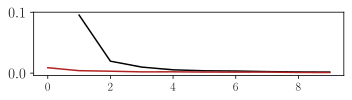

In [44]:
# make plots

fig = plt.figure(figsize=(5, 1.5))
plt.plot(MMD_results_linear_mean[:,0], color='black')
plt.plot(MMD_results_linear_mean[:,1], color='firebrick')
#plt.legend()
plt.tight_layout()

#"""
tpl.save(
    "MMD_Beta.tex",
    figure = fig,
    axis_width = "\\figwidth",
    axis_height= "\\figheight",
    tex_relative_path_to_data=".",
    override_externals=True,
    float_format=".3g"
)
#"""
#plt.savefig('MMD_Beta.pdf')

plt.show();